# Overturning strength in density and temperature space

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
db = '/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_2.db'
session = cc.database.create_session(db)

In [3]:
exptdict = OrderedDict([
    ('Control',  {'expt':'1deg_jra55_ryf_RCPcont'}),
    ('Warming',  {'expt':'1deg_jra55_ryf_RCPwarmhumid'}),
    ('Warming x2',  {'expt':'1deg_jra55_ryf_RCPwarmhumid2x'}),
    ('Cooling',  {'expt':'1deg_jra55_ryf_RCPcoolhumid'}),
    ('Cooling x2',  {'expt':'1deg_jra55_ryf_RCPcoolhumid2x'}),
    ('Warming w/o humidity',  {'expt':'1deg_jra55_ryf_rcpwarm'}),
    ('Cooling w/o humidity',  {'expt':'1deg_jra55_ryf_rcpcool'}),
    ('Cooling w/o humidity2', {'expt':'1deg_jra55_ryf_RCPcool'}),
    ('Windup', {'expt':'1deg_jra55_ryf_red3DSK_C9'})

])


In [4]:
start_time = '2900-01-01'


1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 2min 16s, sys: 16.8 s, total: 2min 32s
Wall time: 3min 4s


Text(0, 0.5, 'Overturning (Sv)')

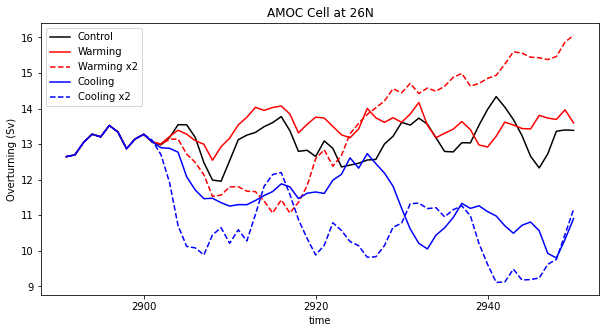

In [5]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = var2.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
    psi_amoc_sum = psi_amoc_sum.sel(potrho=slice(1035.5,None)).max('potrho').resample(time='Y').mean()
    psi_amoc_sum.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('AMOC Cell at 26N')
plt.ylabel('Overturning (Sv)')

suggests that the AMOC volume transport is actually INCREASING in the warming case. Consistent with other model output but opposite to what we might initially think.

1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 12s, sys: 7.57 s, total: 1min 19s
Wall time: 1min


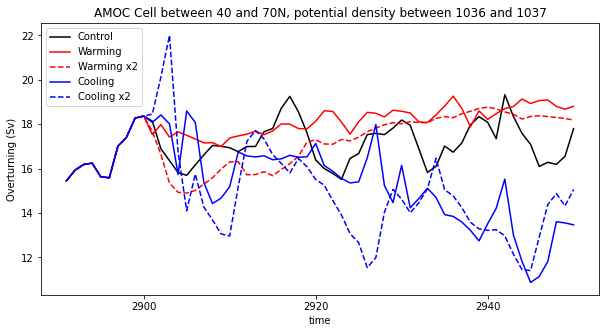

In [6]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = var2.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
    psi_amoc_sum_Sv = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).max('potrho').max('grid_yu_ocean').resample(time='Y').mean()
    psi_amoc_sum_Sv.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_y = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_y.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_rho = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('potrho').resample(time='Y').mean()
#     psi_amoc_sum_rho.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('AMOC Cell between 40 and 70N, potential density between 1036 and 1037')
plt.ylabel('Overturning (Sv)')
plt.savefig('figures/amoc')

1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 13s, sys: 6.18 s, total: 1min 19s
Wall time: 54.9 s


Text(0, 0.5, 'Latitude where AMOC is maximum')

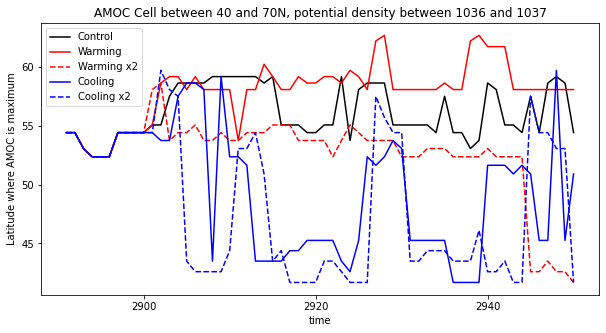

In [16]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = var2.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
#     psi_amoc_sum_Sv = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).max('potrho').max('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_Sv.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    psi_amoc_sum_y = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).max('potrho').idxmax('grid_yu_ocean').resample(time='Y').mean()
    psi_amoc_sum_y.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_rho = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('potrho').resample(time='Y').mean()
#     psi_amoc_sum_rho.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('AMOC Cell between 40 and 70N, potential density between 1036 and 1037')
plt.ylabel('Latitude where AMOC is maximum')

1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 12s, sys: 6.17 s, total: 1min 18s
Wall time: 53.9 s


Text(0, 0.5, 'Potential density where AMOC is maximum')

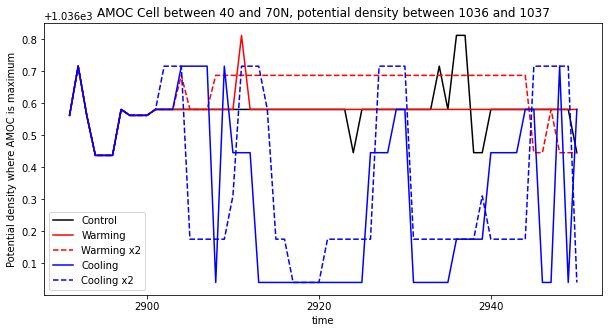

In [17]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = var2.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
#     psi_amoc_sum_Sv = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).max('potrho').max('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_Sv.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_y = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_y.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    psi_amoc_sum_rho = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).max('grid_yu_ocean').idxmax('potrho').resample(time='Y').mean()
    psi_amoc_sum_rho.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('AMOC Cell between 40 and 70N, potential density between 1036 and 1037')
plt.ylabel('Potential density where AMOC is maximum')

In [9]:
psi_amoc_sum

<xarray.DataArray (time: 60, grid_yu_ocean: 48)>
dask.array<stack, shape=(60, 48), dtype=float32, chunksize=(1, 48), chunktype=numpy.ndarray>
Coordinates:
  * time           (time) object 2890-12-31 00:00:00 ... 2949-12-31 00:00:00
  * grid_yu_ocean  (grid_yu_ocean) float64 40.75 41.68 42.59 ... 69.12 69.58

In [7]:
expt = '1deg_jra55_ryf_RCPcont'
ht = cc.querying.getvar(expt,'ht',session,n=-1)
land_mask = ~ht.isnull()

south_map = (land_mask.where(land_mask.yt_ocean < -34)).fillna(0) 
indo_map1 = (land_mask.where(land_mask.yt_ocean < 9).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-65)).fillna(0) 
indo_map2 = (land_mask.where(land_mask.yt_ocean < 15).where(land_mask.yt_ocean > 9).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-83.7)).fillna(0) 
indo_map3 = (land_mask.where(land_mask.yt_ocean < 17).where(land_mask.yt_ocean > 15).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-93.3)).fillna(0) 
indo_map4 = (land_mask.where(land_mask.yt_ocean < 85).where(land_mask.yt_ocean > 17).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-99)).fillna(0) 
indo_map5 = (land_mask.where(land_mask.yt_ocean < 30.5).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >25).where(land_mask.xt_ocean<80)).fillna(0) 
indo_sector_map = indo_map1 + indo_map2 + indo_map3 + indo_map4 + indo_map5 + south_map
indo_sector_mask = indo_sector_map.where(indo_sector_map>0)
atlantic_sector_map = (indo_sector_mask * 0).fillna(1) * land_mask
atlantic_sector_map = atlantic_sector_map + south_map
atlantic_sector_mask = atlantic_sector_map.where(atlantic_sector_map>0)

Text(0.5, 1.0, 'Indo-Pacific + Southern Ocean Mask')

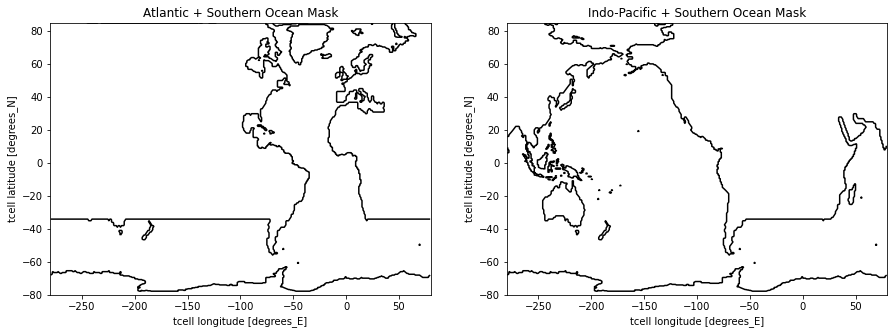

In [8]:
fig, ax=plt.subplots(1,2, figsize=(15,5))

atlantic_sector_map.plot.contour(ax=ax[0],levels=[0.5],colors='k')
ax[0].set_xlim([-280,80])
ax[0].set_ylim([-80,85])
ax[0].set_title('Atlantic + Southern Ocean Mask')
indo_sector_map.plot.contour(ax=ax[1],levels=[0.5],colors='k')
ax[1].set_xlim([-280,80])
ax[1].set_ylim([-80,85])
ax[1].set_title('Indo-Pacific + Southern Ocean Mask')



In [9]:
atlantic_sector_mask

<xarray.DataArray 'ht' (yt_ocean: 300, xt_ocean: 360)>
dask.array<where, shape=(300, 360), dtype=float64, chunksize=(300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 360), meta=np.ndarray>
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 360), meta=np.ndarray>

southern overturning circulation

use indo mask (DIFFERENT TO ABOVE)

In [18]:
south_map = (land_mask.where(land_mask.yt_ocean < -34)).fillna(0) 
indo_map1 = (land_mask.where(land_mask.yt_ocean < 9).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-65)).fillna(0) 
indo_map2 = (land_mask.where(land_mask.yt_ocean < 15).where(land_mask.yt_ocean > 9).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-83.7)).fillna(0) 
indo_map3 = (land_mask.where(land_mask.yt_ocean < 17).where(land_mask.yt_ocean > 15).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-93.3)).fillna(0) 
indo_map4 = (land_mask.where(land_mask.yt_ocean < 85).where(land_mask.yt_ocean > 17).where(land_mask.xt_ocean >-280).where(land_mask.xt_ocean<-99)).fillna(0) 
indo_map5 = (land_mask.where(land_mask.yt_ocean < 30.5).where(land_mask.yt_ocean > -34).where(land_mask.xt_ocean >25).where(land_mask.xt_ocean<80)).fillna(0) 
indo_sector_map = indo_map1 + indo_map2 + indo_map3 + indo_map4 + indo_map5 + south_map
indo_sector_mask = indo_sector_map.where(indo_sector_map>0)
atlantic_sector_map = (indo_sector_mask * 0).fillna(1) * land_mask
atlantic_sector_map = atlantic_sector_map + south_map
atlantic_sector_mask = atlantic_sector_map.where(atlantic_sector_map>0)

psi = cc.querying.getvar(expt,'ty_trans_rho',session, n=1) ## needs to be the same coordinates as what you want to mask
atlantic_sector_mask.coords['xt_ocean'] = psi.grid_xt_ocean.values
atlantic_sector_mask.coords['yt_ocean'] = psi.grid_yu_ocean.values
atlantic_sector_mask = atlantic_sector_mask.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yu_ocean'})
indo_sector_mask.coords['xt_ocean'] = psi.grid_xt_ocean.values
indo_sector_mask.coords['yt_ocean'] = psi.grid_yu_ocean.values
indo_sector_mask = indo_sector_mask.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yu_ocean'})



In [19]:
start_time = '2900-01-31'
gm = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time )
notgm = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
notgm

,Array,Chunk
Bytes,1.60 GB,4.00 MB
Shape,"(50, 74, 300, 360)","(1, 37, 150, 180)"
Count,805 Tasks,400 Chunks
Type,float32,numpy.ndarray


1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 54.8 s, sys: 7.01 s, total: 1min 1s
Wall time: 42.3 s


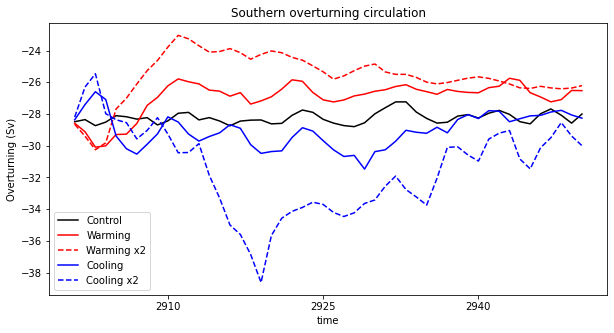

In [21]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Windup': 'k','Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Windup': '-','Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-31'
end_time = '2950-01-31'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,ncfile = 'ocean.nc',start_time = start_time, end_time = end_time ).sel(time = slice('2900-01-01','2950-01-01'))
    psi_amoc = (var*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time, end_time = end_time).sel(time = slice('2900-01-01','2950-01-01'))
        psi_amoc_gm = (var2*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
    psi_amoc_sum_Sv = psi_amoc_sum.sel(grid_yu_ocean = slice(-90,-20)).sel(potrho=slice(1036.7,1037.5)).min('potrho').min('grid_yu_ocean').resample(time='Y').mean()
    psi_amoc_sum_Sv.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_y = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_y.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_rho = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('potrho').resample(time='Y').mean()
#     psi_amoc_sum_rho.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('Southern overturning circulation')
plt.ylabel('Overturning (Sv)')
plt.savefig('figures/moc')

different resolutions in potrho at 2900. 

1deg_jra55_ryf_red3DSK_C9
1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 48s, sys: 11.1 s, total: 2min
Wall time: 1min 19s


Text(0, 0.5, 'Overturning (Sv)')

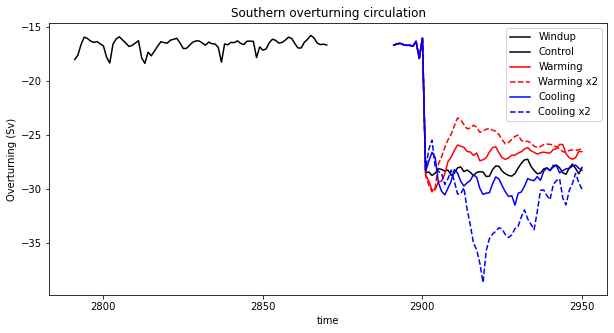

In [23]:
%%time
keys = ['Windup','Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Windup': 'k','Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Windup': '-','Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2800-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = (var*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = (var2*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
    psi_amoc_sum_Sv = psi_amoc_sum.sel(grid_yu_ocean = slice(-90,-20)).sel(potrho=slice(1036.7,1038)).min('potrho').min('grid_yu_ocean').resample(time='Y').mean()
    psi_amoc_sum_Sv.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_y = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_y.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_rho = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('potrho').resample(time='Y').mean()
#     psi_amoc_sum_rho.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('Southern overturning circulation')
plt.ylabel('Overturning (Sv)')

1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 7s, sys: 6.19 s, total: 1min 13s
Wall time: 51.2 s


Text(0, 0.5, 'Overturning (Sv)')

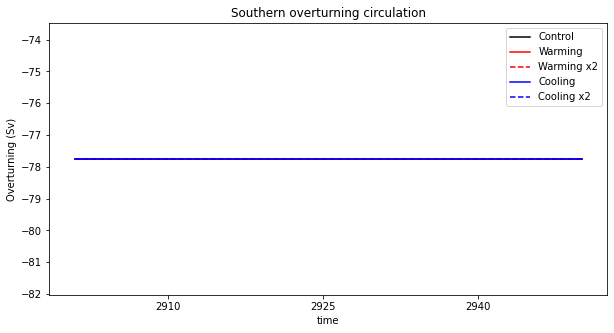

In [22]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-31'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = (var*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = (var2*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
#     psi_amoc_sum_Sv = psi_amoc_sum.sel(grid_yu_ocean = slice(-90,-20)).sel(potrho=slice(1036.7,1038)).min('potrho').min('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_Sv.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    psi_amoc_sum_y = psi_amoc_sum.sel(grid_yu_ocean = slice(-90,-20)).sel(potrho=slice(1036.7,1038)).min('potrho').idxmax('grid_yu_ocean').resample(time='Y').mean()
    psi_amoc_sum_y.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_rho = psi_amoc_sum.sel(grid_yu_ocean = slice(40,70)).sel(potrho=slice(1036,1037)).idxmax('potrho').resample(time='Y').mean()
#     psi_amoc_sum_rho.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('Southern overturning circulation')
plt.ylabel('Overturning (Sv)')

1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 7s, sys: 6.9 s, total: 1min 13s
Wall time: 51 s


Text(0, 0.5, 'Overturning (Sv)')

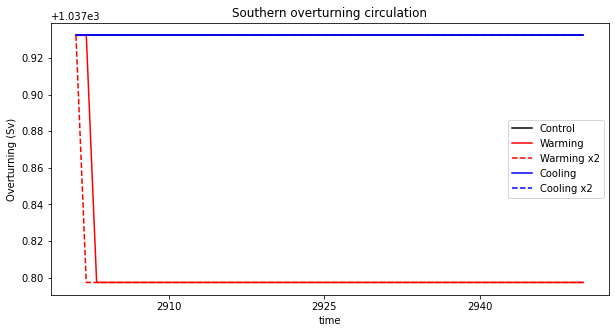

In [23]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-31'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = (var*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = (var2*indo_sector_mask).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
#     psi_amoc_sum_Sv = psi_amoc_sum.sel(grid_yu_ocean = slice(-90,-20)).sel(potrho=slice(1036.7,1038)).min('potrho').min('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_Sv.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#     psi_amoc_sum_y = psi_amoc_sum.sel(grid_yu_ocean = slice(-90,-20)).sel(potrho=slice(1036.7,1038)).min('potrho').idxmax('grid_yu_ocean').resample(time='Y').mean()
#     psi_amoc_sum_y.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    psi_amoc_sum_rho = psi_amoc_sum.sel(grid_yu_ocean = slice(-90,-20)).sel(potrho=slice(1036.7,1038)).min('grid_yu_ocean').idxmax('potrho').resample(time='Y').mean()
    psi_amoc_sum_rho.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('Southern overturning circulation')
plt.ylabel('Overturning (Sv)')

# temperature space amoc

In [10]:
cc.querying.getvar(expt,'ty_trans_nrho',session,ncfile = 'ocean.nc')

VariableNotFoundError: No files were found containing 'ty_trans_nrho' in the '1deg_jra55_ryf_RCPcoolhumid2x' experiment

1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 13s, sys: 4.7 s, total: 1min 18s
Wall time: 1min 11s


Text(0, 0.5, 'Overturning (Sv)')

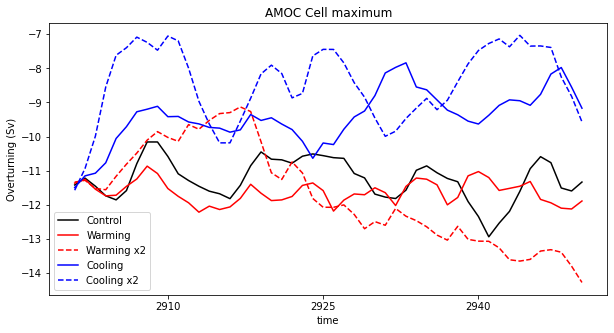

In [12]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_nrho',session,start_time = start_time,ncfile = 'ocean.nc' )
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('neutral') - psi_amoc.sum('neutral')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_nrho_gm',session,start_time = start_time)
        psi_amoc_gm = var2.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
        var3 = cc.querying.getvar(expt,'ty_trans_nrho_submeso',session,start_time = start_time)
        psi_amoc_submeso = var3.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm + psi_amoc_submeso
    except:
        print('GM term not found')
        
    psi_amoc_sum = psi_amoc_sum.sel(neutral=slice(None,15)).min('neutral').min('grid_yu_ocean').resample(time='Y').mean()
    psi_amoc_sum.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('AMOC Cell maximum')
plt.ylabel('Overturning (Sv)')

In [ ]:
%%time
keys = ['Control','Warming','Warming x2','Cooling','Cooling x2']
colors = {'Control': 'k','Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_nrho',session,start_time = start_time,ncfile = 'ocean' )
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('neutral') - psi_amoc.sum('neutral')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_nrho_gm',session,start_time = start_time)
        psi_amoc_gm = var2.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
        var3 = cc.querying.getvar(expt,'ty_trans_nrho_submeso',session,start_time = start_time)
        psi_amoc_submeso = var3.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean')*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm + psi_amoc_submeso
    except:
        print('GM term not found')
        
    psi_amoc_sum = psi_amoc_sum.sel(neutral=slice(None,15)).min('neutral').min('grid_yu_ocean').resample(time='Y').mean()
    psi_amoc_sum.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('AMOC Cell maximum')
plt.ylabel('Overturning (Sv)')